### Курсовой проект.

#### Classification. Choose tutors

Ваша задача этом соревновании - предсказать вероятность того, подойдет ли репетитор для подготовки к экзамену по математике. Вам будут даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки).

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RepeatedKFold
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Загрузим данные

In [2]:
s_submission = pd.read_csv('sample_submission.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### EDA

Посмотрим на загруженные данные

In [3]:
train_df

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,55.0,2.0,2150.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,79.0,0
9996,9996,53.0,2.0,1350.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0
9997,9997,44.0,5.0,1750.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,59.0,0
9998,9998,41.0,0.0,1700.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,72.0,0


In [4]:
test_df

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19995,44.0,3.0,1850.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,68.0
9996,19996,45.0,3.0,2450.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,72.0
9997,19997,44.0,2.0,1250.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,63.0
9998,19998,51.0,5.0,1000.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,64.0


Id - айди\
age - возраст преподавателя\
years_of_experience - стаж преподавателя\
lesson_price - стоимость урока\
qualification - квалификация преподавателя\
physics - преподает ли физику\
chemistry - преподает ли химию\
biology - преподает ли биологию\
english - преподает ли английский\
geography - преподает ли географию\
history - преподает ли историю\
mean_exam_points - средний балл за экзамен учеников\
choose - целевое значени, выбирать или нет преподавателя

Как видно из описания, данных об обучении математике в датасете нет. Но можно предпоожить, что учитель преподающий физику, так же преподает и математику, а биология идет в паре с химией, ну и гуманитарные науки отдельно. Поэтому, можно, в принципе избавится от ненужных признаков - например истории, географии, английского, биологии и химии. Но делать мы этого не будем, попробуем в дальнейшем сформировать новые признаки, связанные с преподаванием физики.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
 12  choose               10000 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [7]:
print('Строк в трейне:', train_df.shape[0])
print('Строк в тесте', test_df.shape[0])

Строк в трейне: 10000
Строк в тесте 10000


Целевая переменная содержится только в train_df

In [8]:
train_df.shape[1] - 1 == test_df.shape[1]

True

Уменьшим размер занятой датасетом памяти:

In [9]:
def reduce_mem_usage(train_df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = train_df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in train_df.columns:
        col_type = train_df[col].dtype
        
        if col_type != object:
            c_min = train_df[col].min()
            c_max = train_df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    train_df[col] = train_df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    train_df[col] = train_df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    train_df[col] = train_df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    train_df[col] = train_df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    train_df[col] = train_df[col].astype(np.float32)
                else:
                    train_df[col] = train_df[col].astype(np.float64)
        else:
            train_df[col] = train_df[col].astype('category')

    end_mem = train_df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return train_df

In [10]:
train_df = reduce_mem_usage(train_df)

Memory usage of dataframe is 0.99 MB
Memory usage after optimization is: 0.45 MB
Decreased by 54.8%


Посмотрим на основные статистические данные:

In [11]:
train_df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.800900,1.974800,1702.439941,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435204,0.110900
std,2886.89568,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000
50%,4999.50000,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000
max,9999.00000,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000


Проверим пропуски в датасете:

In [12]:
train_df.isna().sum()

Id                     0
age                    0
years_of_experience    0
lesson_price           0
qualification          0
physics                0
chemistry              0
biology                0
english                0
geography              0
history                0
mean_exam_points       0
choose                 0
dtype: int64

Пропуски отсутствуют

Посмторим на целевую переменную:

0    8891
1    1109
Name: choose, dtype: int64

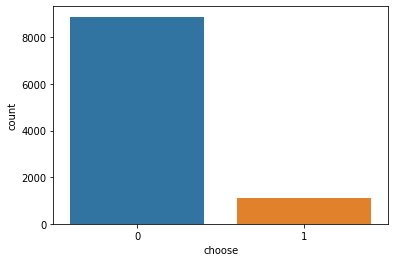

In [13]:
sns.countplot(x="choose", data=train_df)
train_df['choose'].value_counts()

Как видно из графика целевая переменная не сбалансирована - слишком большая разница между ее значениями. Позднее для модели KNN проведем балансировку классов. Для модели случайного леса данные оставим без изменений.  

Посмотрим на распределение признаков:

In [15]:
df_num_features = train_df.select_dtypes(include=['int16','int8', 'float32'])

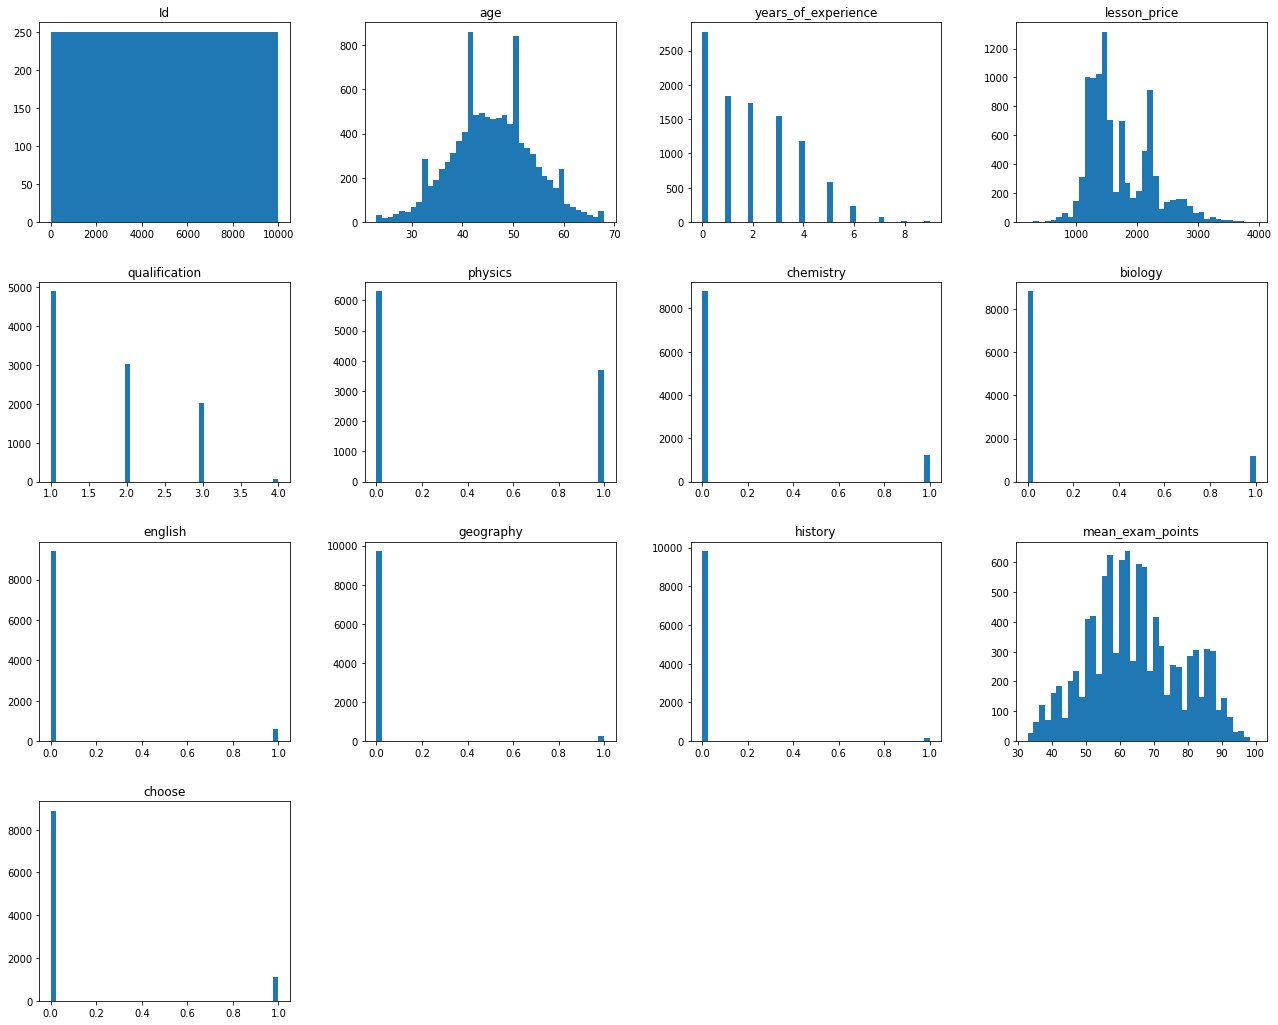

In [23]:
df_num_features.hist(figsize=(22, 18), bins=40, grid = False);

In [ ]:
Признак lesson_price скорее всего содержит выбросы. Посмотрим на них позднее.

In [ ]:
Построим корреляционную матрицу:

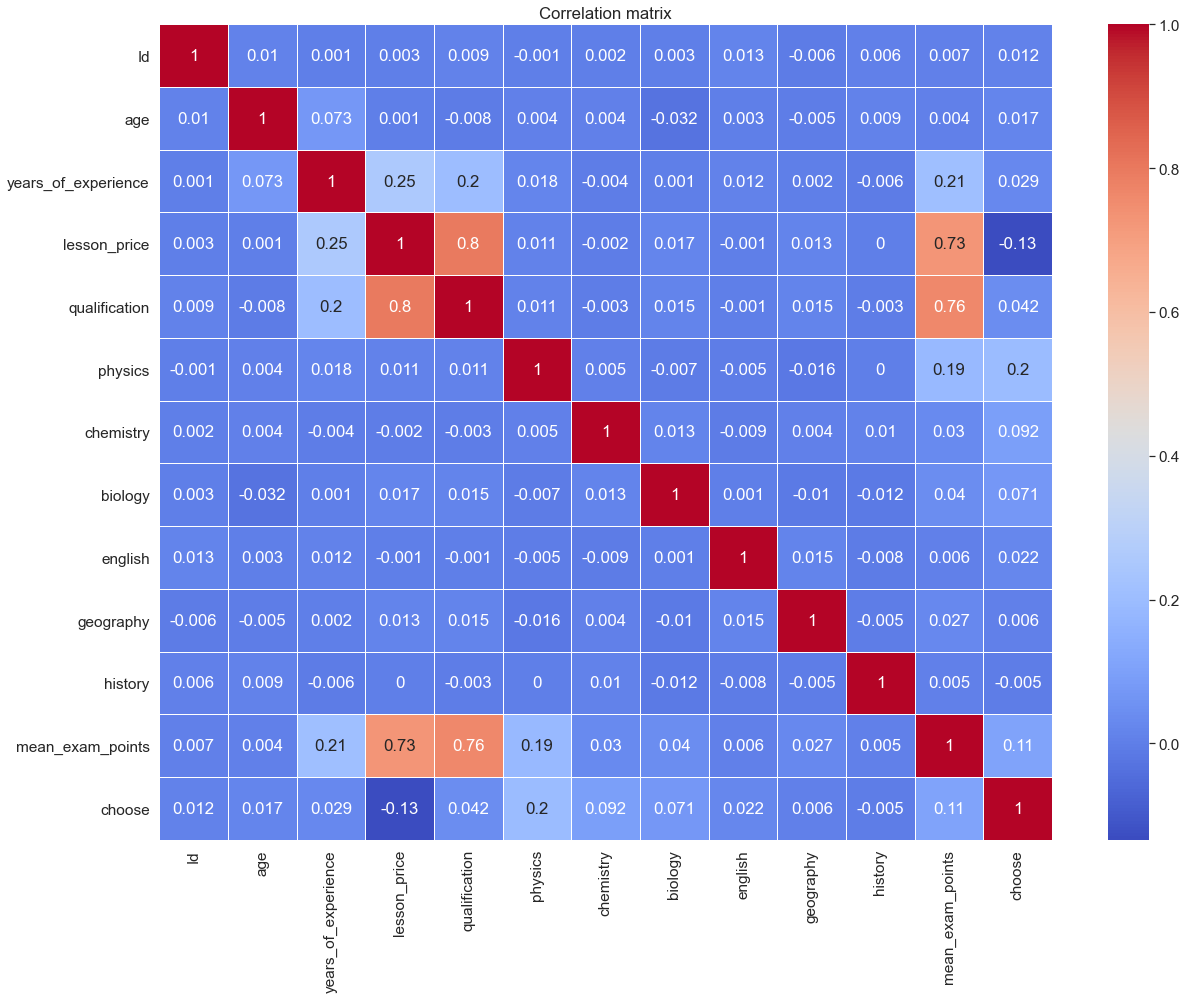

In [24]:
plt.figure(figsize = (20,15))

sns.set(font_scale=1.4)
sns.heatmap(train_df.corr().round(3), annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [ ]:
Признак physics имеет наибольший коэффициент корреляции с признаком choose.

Посмотрим более детально на признак lesson_price:

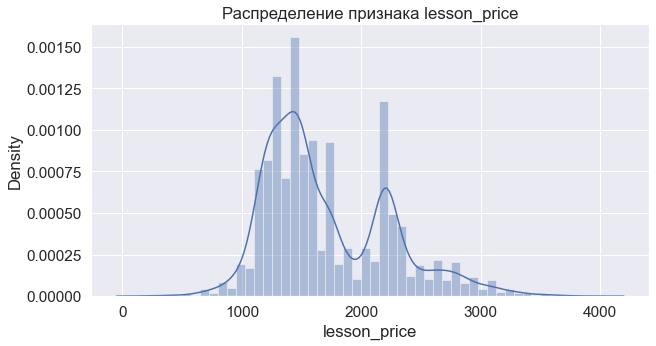

In [25]:
plt.figure(figsize = (10, 5))

sns.distplot(train_df['lesson_price'], bins=50)
plt.title('Распределение признака lesson_price')
plt.show()

 Посомтрим на значения, которые могут быть выбросами:

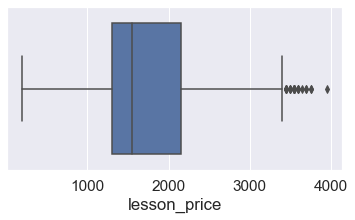

In [27]:
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['lesson_price'], whis=1.5)

plt.xlabel('lesson_price')
plt.show()

In [28]:
train_df['lesson_price'].value_counts()

1450.0    677
1500.0    639
1200.0    614
2200.0    547
1350.0    535
         ... 
3700.0      2
400.0       2
3950.0      1
450.0       1
3650.0      1
Name: lesson_price, Length: 71, dtype: int64

In [29]:
train_df['lesson_price'].describe()

count    10000.000000
mean      1702.439941
std        523.789062
min        200.000000
25%       1300.000000
50%       1550.000000
75%       2150.000000
max       3950.000000
Name: lesson_price, dtype: float64

Значения более 3400 могут быть выбросами, заменим их на медиану.

In [30]:
train_df.loc[train_df['lesson_price'] >= 3400, 'lesson_price'] = train_df['lesson_price'].median()

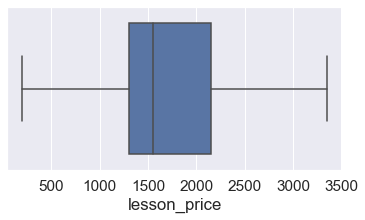

In [31]:
# Посомтрим на знаения, которые могут быть выбросами
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['lesson_price'], whis=1.5)

plt.xlabel('lesson_price')
plt.show()

Поскольку признак Id не несет в себе смысловой нагрузки для данного предсказания, то избавимся от него:

In [32]:
train_df = train_df.drop('Id', 1)
test_df = test_df.drop('Id', 1)

Создадим и добавим новые признаки.

Создадим признак "точные науки", которы связывает между собой переменные среднего балла за экзамен и квалификации у учителей, преподающих физику.

In [33]:
train_df['exact_sciences'] = 0
test_df['exact_sciences'] = 0

In [34]:
train_df.loc[train_df['physics'] == 1, 'exact_sciences'] = train_df['mean_exam_points'] / train_df['qualification']
test_df.loc[test_df['physics'] == 1, 'exact_sciences'] = test_df['mean_exam_points'] / test_df['qualification']

In [36]:
train_df['exact_sciences'].value_counts()

0.000000     6294
29.000000     106
30.000000     103
67.000000      90
28.000000      83
             ... 
33.333332       1
24.333334       1
48.500000       1
18.000000       1
21.333334       1
Name: exact_sciences, Length: 125, dtype: int64

и еще один признак, связывающий квалификацию и стоимость обучения у учителей, преподающих физику.

In [37]:
train_df['lesson_quality'] = 0
test_df['lesson_quality'] = 0

In [38]:
train_df.loc[train_df['physics'] == 1, 'lesson_quality'] = train_df['qualification'] / train_df['lesson_price']
test_df.loc[test_df['physics'] == 1, 'lesson_quality'] = test_df['qualification'] / test_df['lesson_price']

In [40]:
train_df['lesson_quality'].value_counts()

0.000000    6294
0.000833     205
0.000800     195
0.001333     187
0.000769     178
            ... 
0.002581       1
0.001860       1
0.000312       1
0.005000       1
0.001951       1
Name: lesson_quality, Length: 105, dtype: int64

In [39]:
train_df.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose,exact_sciences,lesson_quality
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.800900,1.974800,1696.074951,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435204,0.110900,16.680017,0.000372
std,8.030274,1.766883,513.363586,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024,23.642418,0.000531
min,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000,0.000000,0.000000
25%,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000,0.000000,0.000000
50%,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000,0.000000,0.000000
75%,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000,33.000000,0.000800
max,68.000000,9.000000,3350.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000,93.000000,0.010000


In [ ]:
Посмотрим еще раз на корреляционную матрицу:

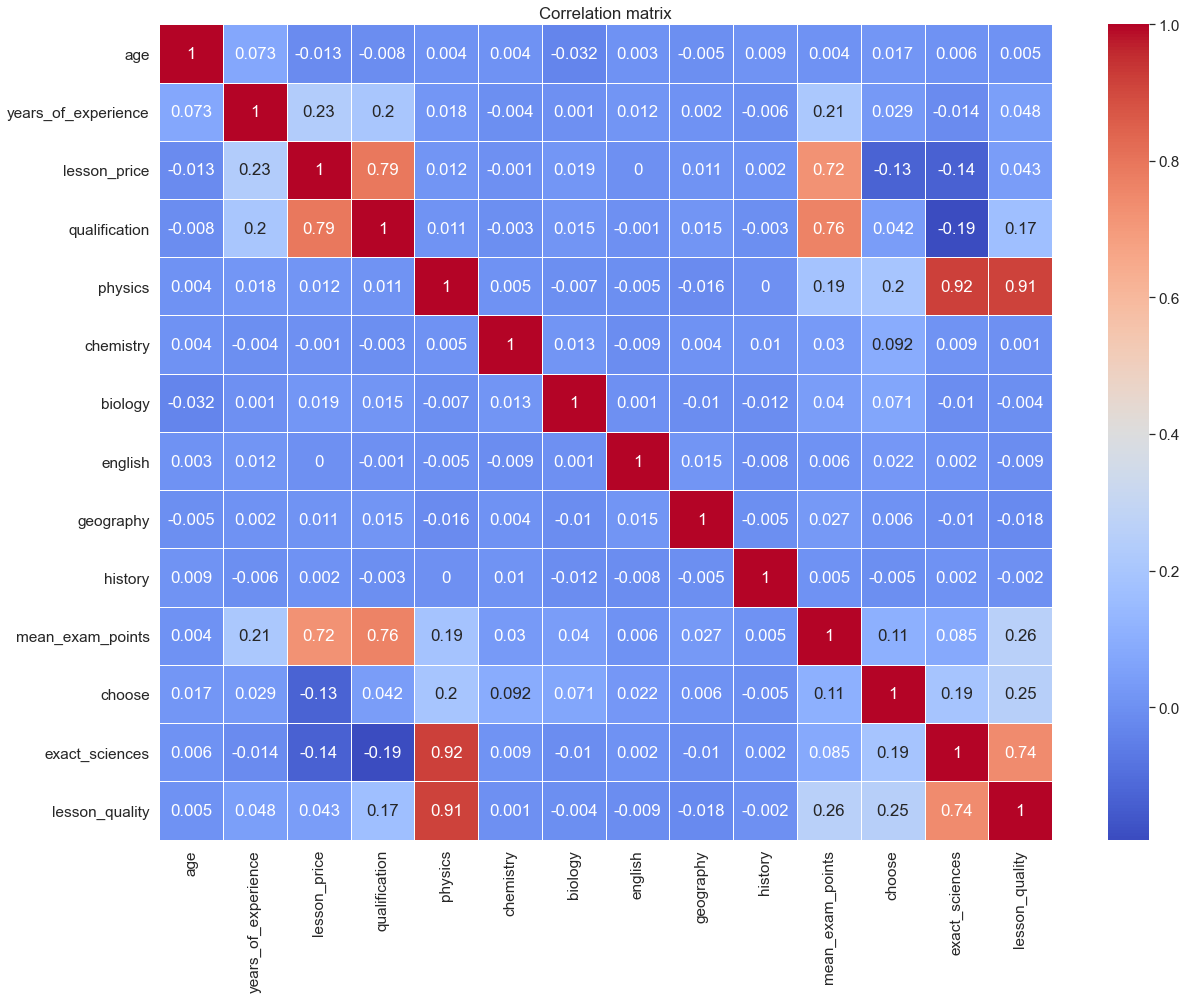

In [41]:
plt.figure(figsize = (20,15))

sns.set(font_scale=1.4)
sns.heatmap(train_df.corr().round(3), annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Подготовим датасет для балансировки классов:

In [43]:
X = train_df.drop('choose', axis=1).values
y = train_df.choose.values

In [44]:
X.shape, y.shape

((10000, 13), (10000,))

In [45]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=1)
X_over_sampl, y_over_sampl = smt.fit_resample(X, y)

In [51]:
X_over_sampl.shape, y_over_sampl.shape 


((17782, 13), (17782,))

Наблюдений в датасете стало больше.

In [52]:
sum(y_over_sampl == 1), sum(y_over_sampl == 0)


(8891, 8891)

Количество значений целовой переменной выровнялось.

### Алгоритм kNN

Данный алгоритм является еще одним способом решения задачи классификации. Расшифровывается его название как "k ближайших соседей (k nearest neighbours)".

Суть его довольно проста и заключается в принципе отнесения объекту к тому классу, представители которого преобладают рядом с ним. Таким образом, упрощенно алгоритм классификации выглядит следующим образом:

найти расстояние от объекта  𝑢  до каждого из объектов  𝑥  обучающей выборки;
выбрать  𝑘  объектов, расстояние до которых минимально;
отнести объект к классу, к которому относится большинство из выбранных  𝑘  ближайших соседей, то есть провести голосование.

Интересной особенностью метода является то, что на этапе обучения не строится модель, а просто запоминается обучающая выборка. Вычисления начинаются именно на этапе решения задачи классификации конкретного объекта (поэтому этот алгоритм можно назвать ленивым).

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_over_sampl, y_over_sampl,
                                                    test_size=0.3,
                                                    random_state=1,
                                                    )
X_train.shape, X_test.shape

((12447, 13), (5335, 13))

In [54]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [76]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

#         Записываем в список ответов наиболее часто встречающийся класс
#         answers.append(sorted(classes, key=classes.get)[-1])
        # Записываем в список ответов вероятность для 1 класса
        answers.append(classes[1] / (classes[1] + classes[0]))
        
    return answers

In [57]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [ ]:
Посмотрим как меняется точность в зависимости от k (количества ближайших соседей):

In [58]:
k = 2

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 2: 0.832


In [60]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.833


In [73]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.799


Наиболее премлемый коэффициент k = 5

Выполним предсказание на тестовых данных:

In [78]:
X_test_knn = test_df.values

In [79]:
k = 5

y_pred = knn(X_train, y_train, X_test_knn, k)

In [80]:
s_submission.choose = y_pred

In [81]:
s_submission.to_csv('submit_prediction_knn.csv', index=False)

Оценка на Kaggle 0.91548

### Random forest

Случайные леса названы так из-за того, что в процесс построения деревьев, из которых они состоят, внесен элемент случайности для обеспечения уникальности каждого из деревьев. Такая рандомизация заключается в обучении базовых алгоритмов на разных подвыборках обучающей выборки. Один из способов построения случайных подвыборок - бутстрап (bootstrap). Этот метод заключается в получении из выборки длины  𝑙  нескольких разных выборок той же длины  𝑙 . Для получения бутстрап-выборки из исходной выборки  𝑙  раз выбирается случайный элемент, причем каждый раз новый элемент выбирается из всей выборки. 

Реализация случайного леса

In [61]:
np.random.seed(42)

def get_bootstrap(data, labels, N):
    n_samples = data.shape[0] # размер совпадает с исходной выборкой
    bootstrap = []
    
    for i in range(N):
        
        sample_index = np.random.randint(0, n_samples, size=n_samples)
        b_data = data[sample_index]
        b_labels = labels[sample_index]
        
        bootstrap.append((b_data, b_labels))
        
    return bootstrap

In [62]:
def get_subsample(len_sample):
    # будем сохранять не сами признаки, а их индексы
    sample_indexes = list(range(len_sample))

    len_subsample = int(np.sqrt(len_sample))
    
    subsample = np.random.choice(sample_indexes, size=len_subsample, replace=False)

    return subsample

In [63]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [64]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
            
        # найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction        

In [65]:
# Расчет критерия Джини

def gini(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [66]:
# Расчет прироста

def gain(left_labels, right_labels, root_gini):

    # доля выборки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return root_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [67]:
# Разбиение датасета в узле

def split(data, labels, column_index, t):
    
    left = np.where(data[:, column_index] <= t)
    right = np.where(data[:, column_index] > t)
        
    true_data = data[left]
    false_data = data[right]
    
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [68]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf_samples = 5

    root_gini = gini(labels)

    best_gain = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    feature_subsample_indices = get_subsample(n_features) # выбираем случайные признаки
    
    for index in feature_subsample_indices:
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique(data[:, index])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
#             if len(true_data) < min_leaf_samples or len(false_data) < min_leaf_samples:
#                 continue
            
            current_gain = gain(true_labels, false_labels, root_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_gain > best_gain:
                best_gain, best_t, best_index = current_gain, t, index

    return best_gain, best_t, best_index

In [69]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels):

    gain, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if gain == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [70]:
def random_forest(data, labels, n_trees):
    forest = []
    bootstrap = get_bootstrap(data, labels, n_trees)
    
    for b_data, b_labels in bootstrap:
        forest.append(build_tree(b_data, b_labels))
        
    return forest

In [71]:
# Функция классификации отдельного объекта

def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [72]:
# функция формирования предсказания по выборке на одном дереве

def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [117]:
# предсказание голосованием деревьев

def tree_vote(forest, data):

    # добавим предсказания всех деревьев в список
    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))
#     print(predictions)

    # сформируем список с предсказаниями для каждого объекта
    predictions_per_object = list(zip(*predictions))
#     print(predictions_per_object)

# #     выберем в качестве итогового предсказания для каждого объекта то,
# #     за которое проголосовало большинство деревьев
#     voted_predictions = []
#     for obj in predictions_per_object:
#         voted_predictions.append(max(set(obj), key=obj.count))
        
    voted_predictions = []
    for obj in predictions_per_object:
        proba = dict(zip(list(obj), [list(obj).count(i) for i in list(obj)]))
        if proba.get(1) is None:
            proba[1] = 0
        if proba.get(0) is None:
            proba[0] = 0
        voted_predictions.append(proba[1] / (proba[1] + proba[0]))
        
    return voted_predictions

In [75]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [82]:
%%time
n_trees = 1
my_forest_1_imb = random_forest(X_train, y_train, n_trees)

Wall time: 33.6 s


In [83]:
# Получим ответы для обучающей выборки 
train_answers = tree_vote(my_forest_1_imb, X_train)

In [84]:
# И получим ответы для тестовой выборки
test_answers = tree_vote(my_forest_1_imb, X_test)

In [85]:
# Точность на обучающей выборке
train_accuracy = accuracy_metric(y_train, train_answers)
print(f'Точность случайного леса из {n_trees} деревьев на обучающей выборке: {train_accuracy:.3f}')

# Точность на тестовой выборке
test_accuracy = accuracy_metric(y_test, test_answers)
print(f'Точность случайного леса из {n_trees} деревьев на тестовой выборке: {test_accuracy:.3f}')

Точность случайного леса из 1 деревьев на обучающей выборке: 87.523
Точность случайного леса из 1 деревьев на тестовой выборке: 84.424


In [86]:
%%time
n_trees = 10
my_forest_10_imb = random_forest(X_train, y_train, n_trees)

Wall time: 4min 30s


In [87]:
# Получим ответы для обучающей выборки 
train_answers = tree_vote(my_forest_10_imb, X_train)

In [88]:
# И получим ответы для тестовой выборки
test_answers = tree_vote(my_forest_10_imb, X_test)

In [89]:
# Точность на обучающей выборке
train_accuracy = accuracy_metric(y_train, train_answers)
print(f'Точность случайного леса из {n_trees} деревьев на обучающей выборке: {train_accuracy:.3f}')

# Точность на тестовой выборке
test_accuracy = accuracy_metric(y_test, test_answers)
print(f'Точность случайного леса из {n_trees} деревьев на тестовой выборке: {test_accuracy:.3f}')

Точность случайного леса из 10 деревьев на обучающей выборке: 94.874
Точность случайного леса из 10 деревьев на тестовой выборке: 89.485


In [90]:
%%time
n_trees = 50
my_forest_50_imb = random_forest(X_train, y_train, n_trees)

Wall time: 25min 26s


In [91]:
# Получим ответы для обучающей выборки 
train_answers = tree_vote(my_forest_50_imb, X_train)

In [92]:
# И получим ответы для тестовой выборки
test_answers = tree_vote(my_forest_50_imb, X_test)

In [93]:
# Точность на обучающей выборке
train_accuracy = accuracy_metric(y_train, train_answers)
print(f'Точность случайного леса из {n_trees} деревьев на обучающей выборке: {train_accuracy:.3f}')

# Точность на тестовой выборке
test_accuracy = accuracy_metric(y_test, test_answers)
print(f'Точность случайного леса из {n_trees} деревьев на тестовой выборке: {test_accuracy:.3f}')

Точность случайного леса из 50 деревьев на обучающей выборке: 95.726
Точность случайного леса из 50 деревьев на тестовой выборке: 90.665


Выберем Random Forest из 50 деревьев. 

In [95]:
y_pred_trees_imb = tree_vote(my_forest_50_imb, X_test_knn)

In [96]:
s_submission_trees_imb = pd.read_csv('sample_submission.csv')

In [97]:
s_submission_trees_imb.choose = y_pred_trees_imb

In [98]:
s_submission_trees_imb.to_csv('submit_prediction_RF_imb.csv', index=False)

Оценка на Kaggle 0.96009

Выполним все тоже самое, только без препроцессинга:

In [100]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [101]:
train_df = train_df.drop('Id', 1)
test_df = test_df.drop('Id', 1)

In [102]:
X = train_df.drop('choose', axis=1).values
y = train_df.choose.values

In [125]:
X_test_r = test_df.values

In [104]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1,
                                                    )
X_train.shape, X_test.shape

((12447, 13), (5335, 13))

In [105]:
%%time
n_trees = 1
my_forest_1 = random_forest(X_train_rf, y_train_rf, n_trees)

Wall time: 680 ms


In [106]:
# Получим ответы для обучающей выборки 
train_answers = tree_vote(my_forest_1, X_train_rf)

In [107]:
# И получим ответы для тестовой выборки
test_answers = tree_vote(my_forest_1, X_test_rf)

In [108]:
# Точность на обучающей выборке
train_accuracy = accuracy_metric(y_train_rf, train_answers)
print(f'Точность случайного леса из {n_trees} деревьев на обучающей выборке: {train_accuracy:.3f}')

# Точность на тестовой выборке
test_accuracy = accuracy_metric(y_test_rf, test_answers)
print(f'Точность случайного леса из {n_trees} деревьев на тестовой выборке: {test_accuracy:.3f}')

Точность случайного леса из 1 деревьев на обучающей выборке: 90.757
Точность случайного леса из 1 деревьев на тестовой выборке: 86.467


In [109]:
%%time
n_trees = 10
my_forest_10 = random_forest(X_train_rf, y_train_rf, n_trees)

Wall time: 10.3 s


In [110]:
# Получим ответы для обучающей выборки 
train_answers = tree_vote(my_forest_10, X_train_rf)

In [111]:
# И получим ответы для тестовой выборки
test_answers = tree_vote(my_forest_10, X_test_rf)

In [112]:
# Точность на обучающей выборке
train_accuracy = accuracy_metric(y_train_rf, train_answers)
print(f'Точность случайного леса из {n_trees} деревьев на обучающей выборке: {train_accuracy:.3f}')

# Точность на тестовой выборке
test_accuracy = accuracy_metric(y_test_rf, test_answers)
print(f'Точность случайного леса из {n_trees} деревьев на тестовой выборке: {test_accuracy:.3f}')

Точность случайного леса из 10 деревьев на обучающей выборке: 93.900
Точность случайного леса из 10 деревьев на тестовой выборке: 89.500


In [113]:
%%time
n_trees = 50
my_forest_50 = random_forest(X_train_rf, y_train_rf, n_trees)

Wall time: 50.7 s


In [114]:
# Получим ответы для обучающей выборки 
train_answers = tree_vote(my_forest_50, X_train_rf)

In [115]:
# И получим ответы для тестовой выборки
test_answers = tree_vote(my_forest_50, X_test_rf)

In [116]:
# Точность на обучающей выборке
train_accuracy = accuracy_metric(y_train_rf, train_answers)
print(f'Точность случайного леса из {n_trees} деревьев на обучающей выборке: {train_accuracy:.3f}')

# Точность на тестовой выборке
test_accuracy = accuracy_metric(y_test_rf, test_answers)
print(f'Точность случайного леса из {n_trees} деревьев на тестовой выборке: {test_accuracy:.3f}')

Точность случайного леса из 50 деревьев на обучающей выборке: 94.443
Точность случайного леса из 50 деревьев на тестовой выборке: 89.600


In [135]:
y_pred_trees_ = tree_vote(my_forest_50, X_test_r)

In [136]:
s_submission_tr_rf = pd.read_csv('sample_submission.csv')

In [137]:
s_submission_tr_rf.choose = y_pred_trees_

In [138]:
s_submission_trees_rf.to_csv('submit_prediction_RF_rf.csv', index=False)

Оценка на Kaggle 0.97539